In [7]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt 
from functions import (
    clean_and_combine, 
    get_vix_data,
    get_interest_data, 
    get_cpi_inflation_data, 
    calculate_investment_evolution,
    plot_evolution_of_prices_with_events,
    plot_investment_evolution_with_key_dates,
    plot_vix_vs_prices,
    analyze_vix_peaks_and_price_changes,
    plot_interest_vs_prices,
    analyze_event_price_changes,
    plot_inflation_comparison,
    analyze_inflation_peak_price_changes,
    plot_correlation_heatmap,
    plot_stacked_investment_growth,
    analyze_portfolio_composition,
    plot_bubble_inflation_vs_price,
    plot_violin_returns,
    plot_bubble_interest_vix,
    analyze_high_interest_and_volatility
)

In [8]:
# Cargar los archivos CSV que contienen los datos de oro, bitcoin y S&P 500
# Los archivos son fuentes de datos históricos que se analizarán y combinarán en un único dataframe

df_gold = pd.read_csv("df_gold.csv")
df_bitcoin = pd.read_csv("df_bitcoin.csv")
df_sp500 = pd.read_csv("df_sp500.csv")

# Obtener los datos externos desde fuentes API o servicios como Yahoo Finance
# 1. Datos del VIX (índice del miedo, volatilidad implícita)
df_vix = get_vix_data()

# 2. Datos de la tasa de interés de la Reserva Federal
df_interest = get_interest_data()

# 3. Datos del Índice de Precios al Consumidor (CPI) e inflación
df_cpi_inflation = get_cpi_inflation_data()

c:\Users\usr\Documents\GitHub\data-wrangling-project\functions.py:67: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual = df_cpi.resample('A').last()  # Obtener el último valor de cada año
c:\Users\usr\Documents\GitHub\data-wrangling-project\functions.py:76: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_daily_cpi = df_daily_cpi.fillna(method='ffill').fillna(method='bfill').round(2)


In [9]:
# Combinar y limpiar todos los datasets: oro, bitcoin, S&P 500, VIX, tasa de interés y CPI/inflación
# Esta función combina todos los dataframes, estandariza las fechas y ajusta los valores para que puedan ser comparados
df_combined = clean_and_combine(df_gold, df_bitcoin, df_sp500, df_vix, df_interest, df_cpi_inflation)

# Calcular la evolución de la inversión, sumando $100 mensuales en Bitcoin, Oro y S&P 500
# Esta función calcula el rendimiento de la inversión y lo añade directamente a 'df_combined'
df_combined = calculate_investment_evolution(df_combined)

# Mostrar el dataframe combinado en Jupyter Notebook
df_combined

c:\Users\usr\Documents\GitHub\data-wrangling-project\functions.py:102: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sp500['price_sp500'] = pd.to_numeric(df_sp500['price_sp500'].str.replace(',', ''), errors='coerce').fillna(method='ffill').round(0).astype(int)
c:\Users\usr\Documents\GitHub\data-wrangling-project\functions.py:127: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M', on='date').last()
c:\Users\usr\Documents\GitHub\data-wrangling-project\functions.py:142: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '209.48275862068965' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_monthly.loc[df_monthly.index[i], 'investment_bitcoin'] = (
c:\Users\usr\Documents\GitHub\data-wrangling-project\fun

,date,price_bitcoin,price_gold,price_sp500,change_bitcoin,change_gold,vix,interest_rate,cpi,inflation,investment_bitcoin,investment_gold,investment_sp500
0,2015-01-02,315,1186,2058,0.10,0.18,17.79,0.01,234.82,0.76,100.00000,100.000000,100.000000
1,2015-01-05,275,1204,2021,3.82,1.50,19.92,0.00,234.84,0.76,100.00000,100.000000,100.000000
2,2015-01-06,282,1219,2003,2.70,1.28,21.12,0.02,234.84,0.76,100.00000,100.000000,100.000000
3,2015-01-07,291,1211,2026,3.21,-0.71,19.31,0.02,234.84,0.76,100.00000,100.000000,100.000000
4,2015-01-08,283,1208,2062,-2.97,-0.18,17.01,0.02,234.85,0.76,100.00000,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,2024-02-05,42697,2043,4943,0.27,-0.53,13.67,5.23,307.54,3.35,370584.28199,15246.307244,18928.875797
2289,2024-02-06,43088,2051,4954,0.91,0.42,13.06,5.22,307.56,3.35,370584.28199,15246.307244,18928.875797
2290,2024-02-07,44340,2052,4995,2.91,0.01,12.83,5.22,307.58,3.35,370584.28199,15246.307244,18928.875797
2291,2024-02-08,45293,2048,4998,2.15,-0.19,12.79,5.22,307.60,3.35,370584.28199,15246.307244,18928.875797


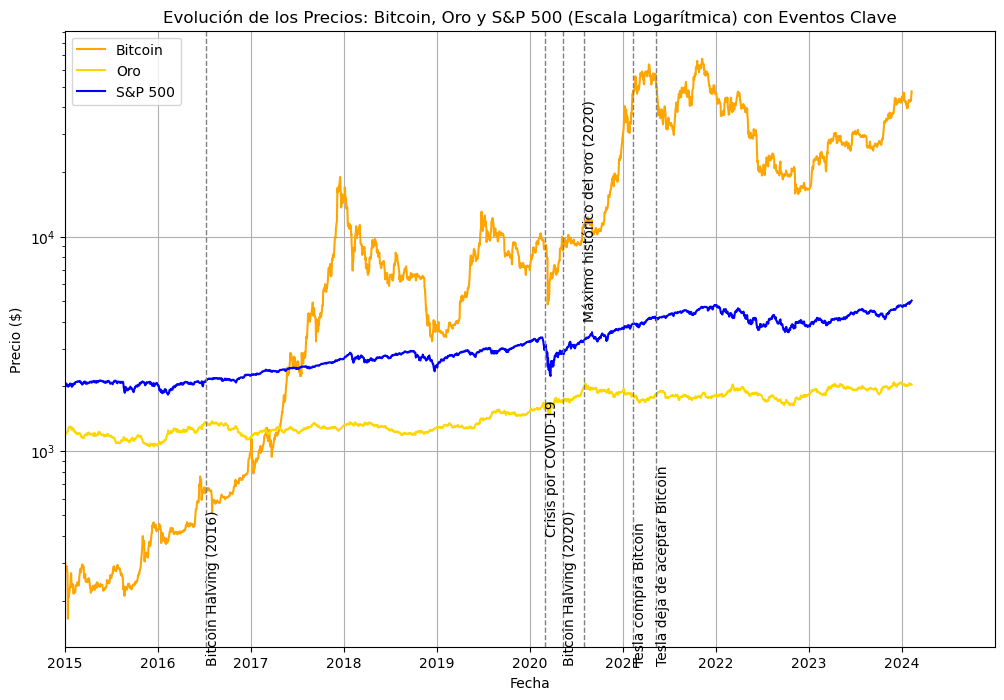

In [10]:
# Generar el gráfico de evolución de precios con eventos clave
plot_evolution_of_prices_with_events(df_combined)

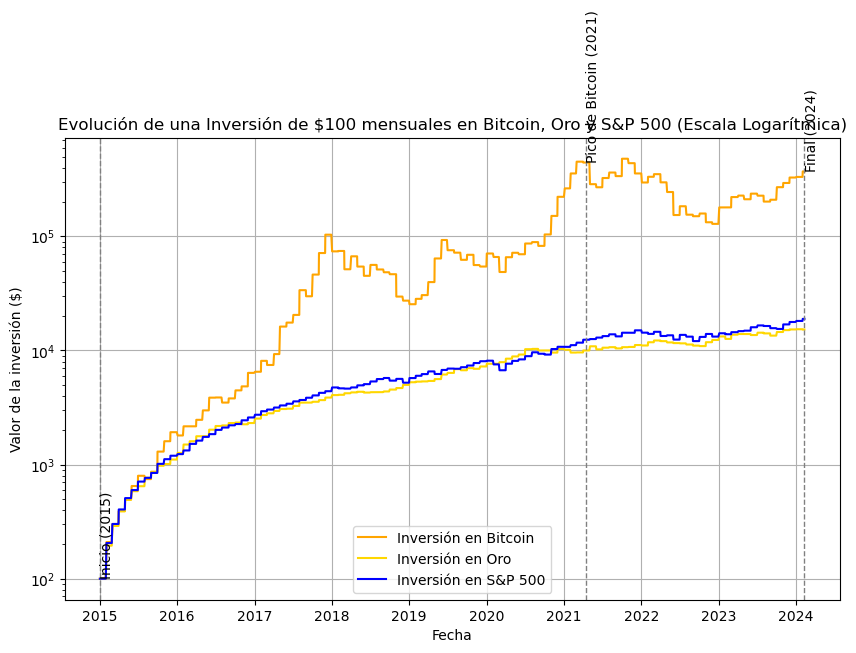

In [11]:
# Generar el gráfico de evolución de inversión con fechas clave
plot_investment_evolution_with_key_dates(df_combined)

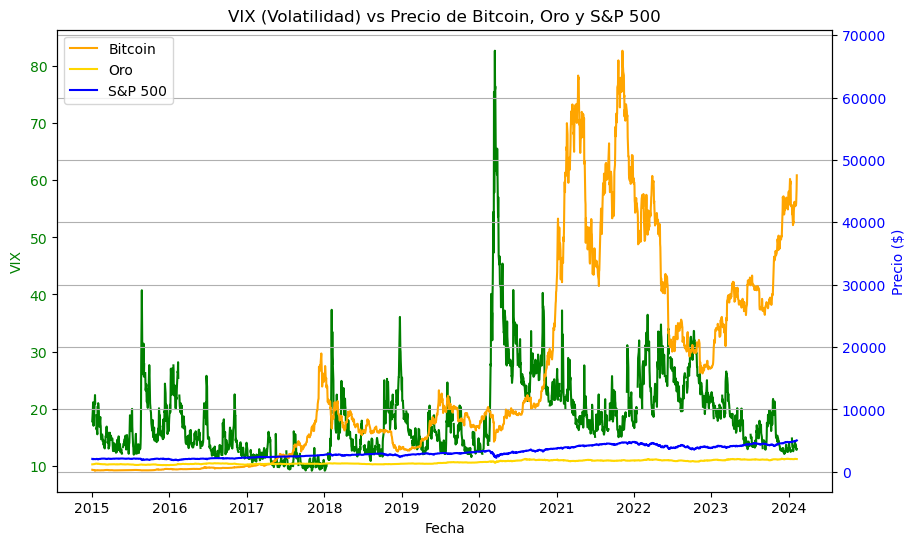

In [12]:
# Generar el gráfico de VIX vs precios de Bitcoin, Oro y S&P 500
plot_vix_vs_prices(df_combined)

In [13]:
# Analizar los picos del VIX y calcular los cambios porcentuales en precios
price_changes = analyze_vix_peaks_and_price_changes(df_combined)

# Mostrar los resultados
print(price_changes)

{'2020-03-16T00:00:00.000000000': {'Bitcoin': (-5.784383954154728, 5584, 5261), 'Oro': (0.5932762030323006, 1517, 1526), 'S&P 500': (-6.713389893028403, 2711, 2529)}, '2020-03-18T00:00:00.000000000': {'Bitcoin': (17.316099600836342, 5261, 6172), 'Oro': (-3.079947575360419, 1526, 1479), 'S&P 500': (-4.744958481613286, 2529, 2409)}, '2020-03-17T00:00:00.000000000': {'Bitcoin': (6.580516898608351, 5030, 5361), 'Oro': (-0.5383580080753702, 1486, 1478), 'S&P 500': (0.5029337803855826, 2386, 2398)}}


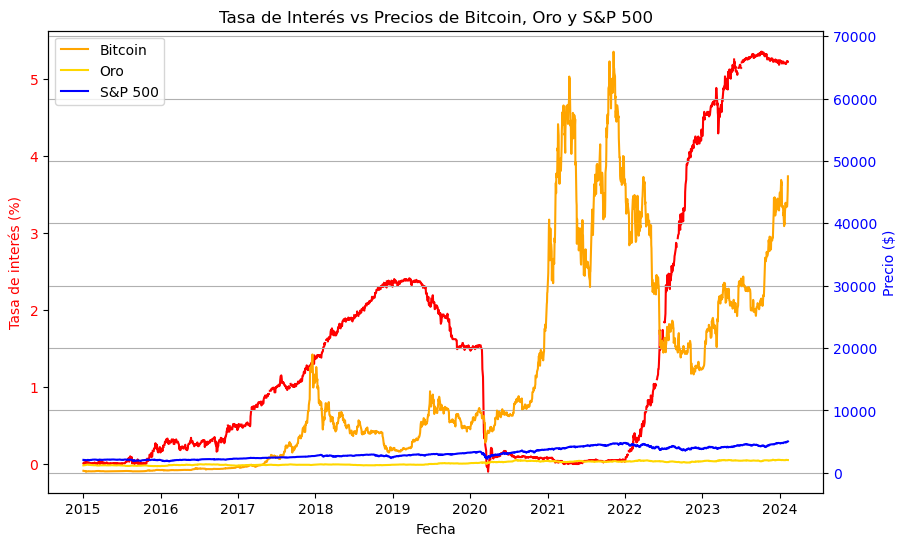

In [14]:
# Generar el gráfico de tasa de interés vs precios de Bitcoin, Oro y S&P 500
plot_interest_vs_prices(df_combined)

In [15]:
# Analizar cambios porcentuales durante los eventos clave
price_changes_covid, price_changes_rate_hike = analyze_event_price_changes(df_combined)

# Mostrar los resultados
print("Cambios porcentuales durante el crash del COVID-19:")
print(price_changes_covid)

print("\nCambios porcentuales durante el aumento de tasas de interés:")
print(price_changes_rate_hike)

Cambios porcentuales durante el crash del COVID-19:
{'Bitcoin': (903.7563765651569, 6469, 64933, Timestamp('2020-03-23 00:00:00'), Timestamp('2021-11-10 00:00:00')), 'Oro': (17.857142857142858, 1568, 1848, Timestamp('2020-03-23 00:00:00'), Timestamp('2021-11-10 00:00:00')), 'S&P 500': (107.73357174787661, 2237, 4647, Timestamp('2020-03-23 00:00:00'), Timestamp('2021-11-10 00:00:00'))}

Cambios porcentuales durante el aumento de tasas de interés:
{'Bitcoin': (-28.81893644217886, 64933, 46220, Timestamp('2021-11-10 00:00:00'), Timestamp('2021-12-31 00:00:00')), 'Oro': (-1.0281385281385282, 1848, 1829, Timestamp('2021-11-10 00:00:00'), Timestamp('2021-12-31 00:00:00')), 'S&P 500': (2.560791908758339, 4647, 4766, Timestamp('2021-11-10 00:00:00'), Timestamp('2021-12-31 00:00:00'))}


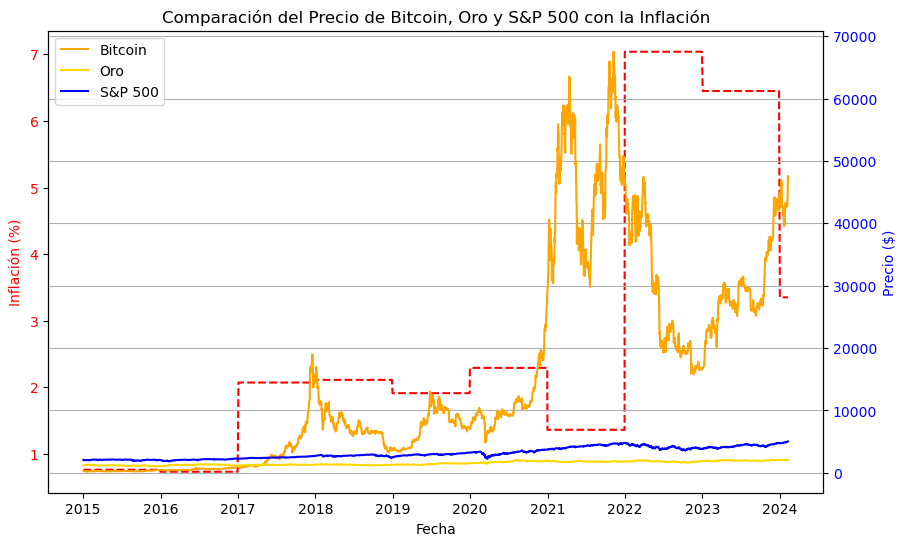

In [16]:
# Generar el gráfico de inflación vs precios de Bitcoin, Oro y S&P 500
plot_inflation_comparison(df_combined)

In [17]:
# Analizar los cambios de precios durante el pico de inflación (2021-2022)
price_changes_inflation_2021 = analyze_inflation_peak_price_changes(df_combined)

# Mostrar los resultados
print(price_changes_inflation_2021)

{'Bitcoin': (59.66009188573008, 28949, 46220, Timestamp('2020-12-31 00:00:00'), Timestamp('2021-12-31 00:00:00')), 'Oro': (-3.4828496042216357, 1895, 1829, Timestamp('2020-12-31 00:00:00'), Timestamp('2021-12-31 00:00:00')), 'S&P 500': (26.89030883919063, 3756, 4766, Timestamp('2020-12-31 00:00:00'), Timestamp('2021-12-31 00:00:00'))}


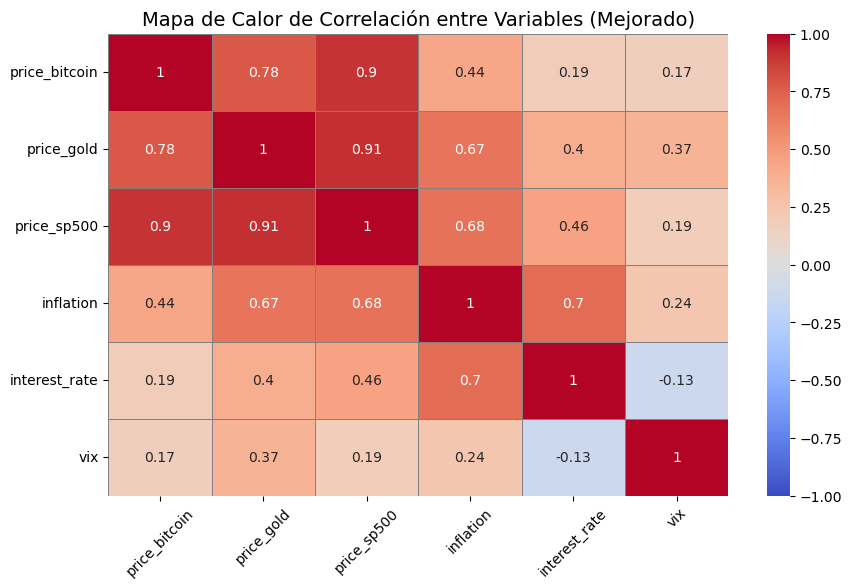

In [18]:
# Generar el mapa de calor de correlaciones entre variables
plot_correlation_heatmap(df_combined)

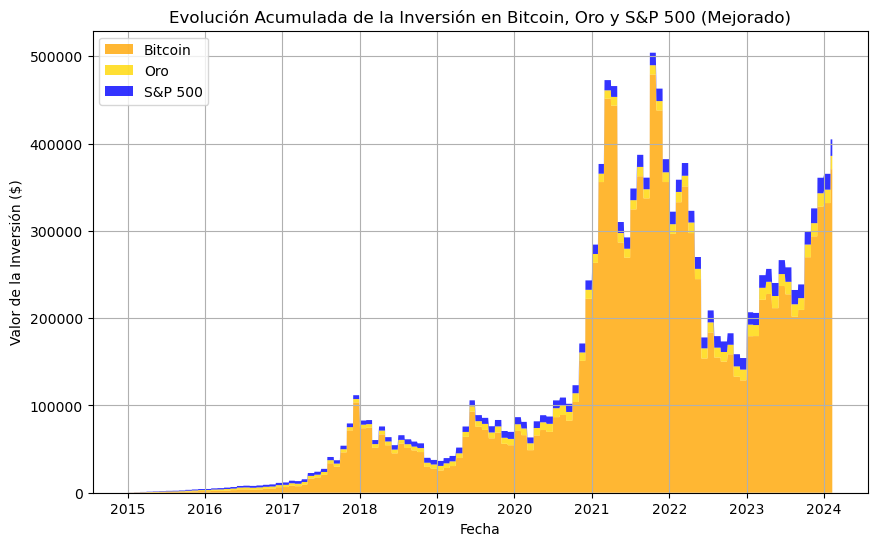

In [19]:
# Generar el gráfico de área apilada de la evolución acumulada de la inversión
plot_stacked_investment_growth(df_combined)

In [20]:
# Calcular las proporciones de la cartera en el pico de Bitcoin y la caída en 2022
composition_at_peak, composition_at_drop = analyze_portfolio_composition(df_combined)

# Mostrar los resultados
print("Composición de la cartera en el pico de Bitcoin (2021):")
print(composition_at_peak)

print("\nComposición de la cartera en la caída de 2022:")
print(composition_at_drop)

Composición de la cartera en el pico de Bitcoin (2021):
{'Bitcoin': 94.5914062082701, 'Oro': 2.3204406213157887, 'S&P 500': 3.0881531704141008, 'Total ($)': 462886.8344122718}

Composición de la cartera en la caída de 2022:
{'Bitcoin': 86.46619639960214, 'Oro': 6.526475920220866, 'S&P 500': 7.007327680176988, 'Total ($)': 177856.00963218856}


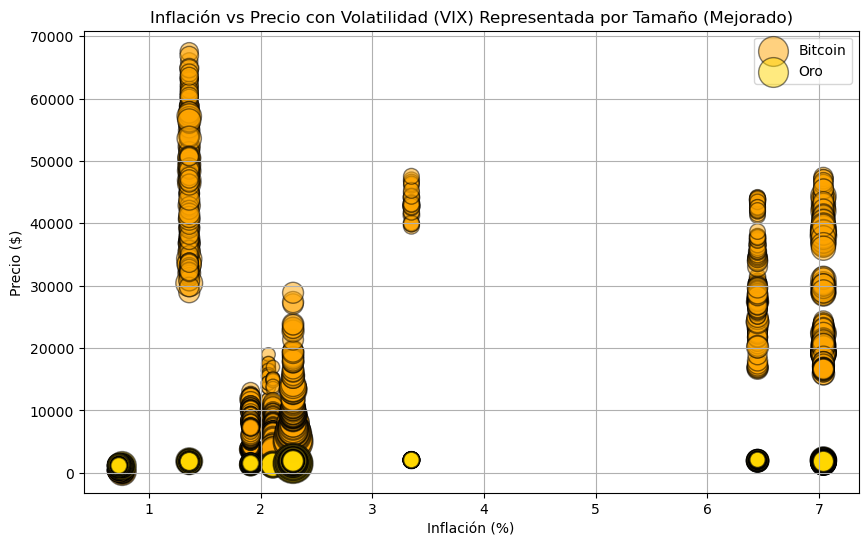

In [21]:
# Generar el gráfico de burbujas para Inflación vs Precio con VIX representado por tamaño
plot_bubble_inflation_vs_price(df_combined)

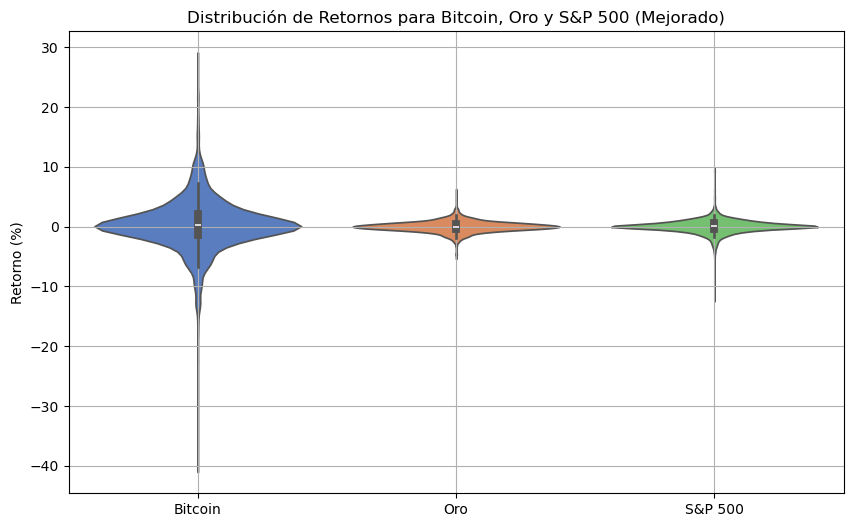

In [22]:
# Generar el gráfico de violín para la distribución de retornos
plot_violin_returns(df_combined)

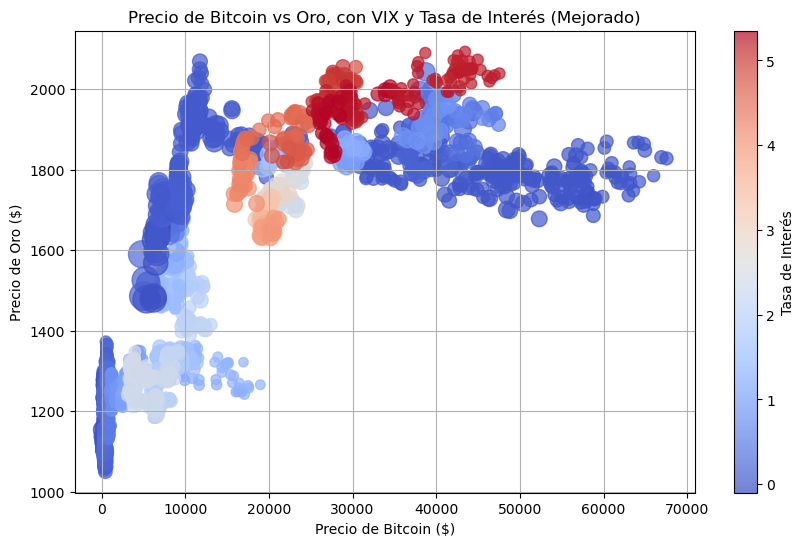

In [23]:
# Generar el gráfico de burbuja (Precio de Bitcoin vs Oro, con VIX y Tasa de Interés)
plot_bubble_interest_vix(df_combined)

In [24]:
# Calcular las medias de precios de Bitcoin y Oro en momentos de altas tasas de interés y alta volatilidad
high_interest_and_vix_analysis = analyze_high_interest_and_volatility(df_combined)

# Mostrar los resultados
print(high_interest_and_vix_analysis)

{'Bitcoin (Tasa de interés > 4%)': 28635.332258064514, 'Oro (Tasa de interés > 4%)': 1939.2129032258065, 'Bitcoin (VIX > 30)': 16647.90070921986, 'Oro (VIX > 30)': 1719.7943262411347}
